# Exploration du dataset Sentiment140

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Chargement du dataset depuis le dossier data
df = pd.read_csv(
    "../data/sentiment140.csv",
    encoding="latin-1",
    header=None
)

# Attribution des noms de colonnes
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Conversion des labels : 0 = négatif, 4 = positif → 0/1
df["target"] = df["target"].apply(lambda x: 1 if x == 4 else 0)

# Échantillonnage équilibré de 16 000 tweets
df_neg = df[df["target"] == 0].sample(8000, random_state=42)
df_pos = df[df["target"] == 1].sample(8000, random_state=42)
df_small = pd.concat([df_neg, df_pos]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Taille du dataset réduit :", df_small.shape)
print(df_small["target"].value_counts())

# Découpage Train / Validation / Test
train_df, test_df = train_test_split(
    df_small, test_size=0.2, random_state=42, stratify=df_small["target"]
)

train_texts, val_texts, y_train, y_val = train_test_split(
    train_df["text"], train_df["target"], test_size=0.2, random_state=42, stratify=train_df["target"]
)

print("Train:", len(train_texts))
print("Validation:", len(val_texts))
print("Test:", len(test_df))

# Sauvegarde du dataset réduit pour réutilisation
df_small.to_csv("../data/sentiment140_light.csv", index=False, encoding="utf-8")
print("Fichier sentiment140_light.csv créé dans /data")


Taille du dataset réduit : (16000, 6)
target
1    8000
0    8000
Name: count, dtype: int64
Train: 10240
Validation: 2560
Test: 3200
Fichier sentiment140_light.csv créé dans /data


,target,id,date,flag,user,text
0,1,2007530999,Tue Jun 02 12:46:34 PDT 2009,NO_QUERY,Zensunni,@pbadstibner I have good balance..used to do m...
1,0,2053389416,Sat Jun 06 04:22:50 PDT 2009,NO_QUERY,nikki050572,@gtissa Still having issue and it's GDI!!! The...
2,0,2202299998,Tue Jun 16 21:33:49 PDT 2009,NO_QUERY,BigBossBeta,@Chrismorris528 Sigh. In 3 hours. It sucks to ...
3,0,2013656571,Tue Jun 02 23:13:29 PDT 2009,NO_QUERY,haushi87,@HelloEli exacly
4,1,1677310858,Sat May 02 01:26:00 PDT 2009,NO_QUERY,tristantales,In fairness. He smells good.



--- Informations générales ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  16000 non-null  int64 
 1   id      16000 non-null  int64 
 2   date    16000 non-null  object
 3   flag    16000 non-null  object
 4   user    16000 non-null  object
 5   text    16000 non-null  object
dtypes: int64(2), object(4)
memory usage: 750.1+ KB

--- Statistiques globales ---


,target,id,date,flag,user,text
count,16000.000000,1.600000e+04,16000,16000,16000,16000
unique,NaN,NaN,15832,1,15291,15987
top,NaN,NaN,Sat Jun 06 19:40:29 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,2,16000,8,5
mean,0.500000,1.999674e+09,NaN,NaN,NaN,NaN
std,0.500016,1.943592e+08,NaN,NaN,NaN,NaN
min,0.000000,1.467816e+09,NaN,NaN,NaN,NaN
25%,0.000000,1.957240e+09,NaN,NaN,NaN,NaN
50%,0.500000,2.002712e+09,NaN,NaN,NaN,NaN
75%,1.000000,2.177771e+09,NaN,NaN,NaN,NaN



--- Valeurs manquantes ---
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


C:\Users\vicau\AppData\Local\Temp\ipykernel_19824\3988785873.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="viridis")


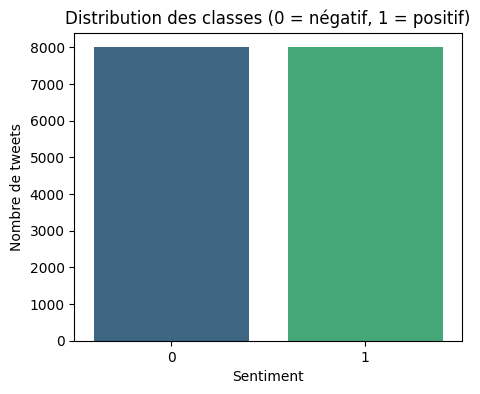

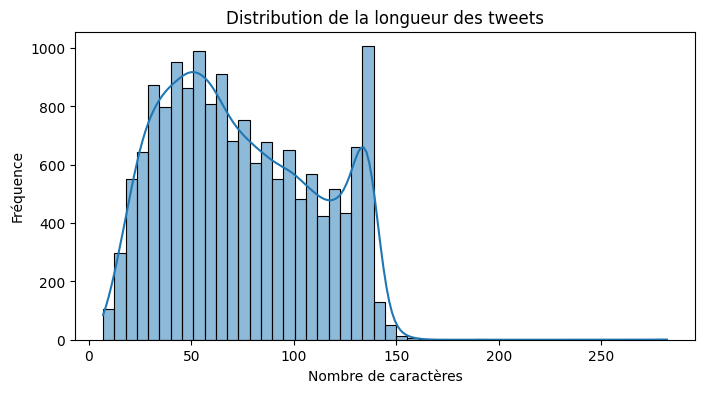


--- Longueurs moyennes des tweets ---
         count      mean        std  min   25%   50%    75%    max
target                                                            
0       8000.0  74.72975  36.817973  7.0  44.0  70.0  104.0  192.0
1       8000.0  73.59000  35.872350  8.0  44.0  68.0  102.0  282.0

--- Exemples de tweets négatifs ---


1    @gtissa Still having issue and it's GDI!!! The...
2    @Chrismorris528 Sigh. In 3 hours. It sucks to ...
3                                    @HelloEli exacly 
6              http://bit.ly/Wl9yL  i want to go here 
8    @TrueBunbarian I bet you are counting down. Ye...
Name: text, dtype: object


--- Exemples de tweets positifs ---


0    @pbadstibner I have good balance..used to do m...
4                        In fairness. He smells good. 
5    beats the heat with cool guava juice in handi ...
7    @YouHerevideo  I recommend Tweetdeck - you can...
9    @fattysammy Is perfectly cooked and delicious ...
Name: text, dtype: object

In [13]:
# Exploration rapide du dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset réduit
df = pd.read_csv("../data/sentiment140_light.csv", encoding="utf-8")

# Aperçu général
display(df.head())
print("\n--- Informations générales ---")
df.info()

print("\n--- Statistiques globales ---")
display(df.describe(include='all'))

# Vérification des valeurs manquantes
print("\n--- Valeurs manquantes ---")
print(df.isna().sum())

# Distribution de la variable cible
plt.figure(figsize=(5,4))
sns.countplot(x="target", data=df, palette="viridis")
plt.title("Distribution des classes (0 = négatif, 1 = positif)")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de tweets")
plt.show()

# Longueur des tweets
df["text_length"] = df["text"].apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution de la longueur des tweets")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.show()

print("\n--- Longueurs moyennes des tweets ---")
print(df.groupby("target")["text_length"].describe())

# Exemple de tweets positifs et négatifs
print("\n--- Exemples de tweets négatifs ---")
display(df[df["target"] == 0]["text"].head(5))

print("\n--- Exemples de tweets positifs ---")
display(df[df["target"] == 1]["text"].head(5))


# Tests de plusieurs models 

## Préparation commune

In [14]:
# === Préparation commune ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset réduit
df = pd.read_csv("../data/sentiment140_light.csv", encoding="utf-8")
X = df["text"]
y = df["target"]

# Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{title} - Matrice de confusion")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()


### 1. Modèle classique — TF-IDF + Logistic Regression

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

model_lr = LogisticRegression(max_iter=300)
model_lr.fit(X_train_tfidf, y_train)
y_pred_lr = model_lr.predict(X_test_tfidf)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")


KeyboardInterrupt: 

### 2. TF-IDF + Random Forest

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      1600
           1       0.70      0.75      0.72      1600

    accuracy                           0.71      3200
   macro avg       0.72      0.72      0.71      3200
weighted avg       0.72      0.71      0.71      3200

Accuracy: 0.715
F1-score: 0.7244712990936556


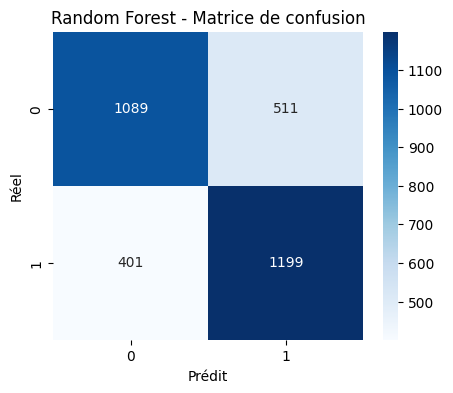

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=150, random_state=42)
model_rf.fit(X_train_tfidf, y_train)
y_pred_rf = model_rf.predict(X_test_tfidf)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


### 3. TF-IDF + Naive Bayes

=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1600
           1       0.73      0.70      0.71      1600

    accuracy                           0.72      3200
   macro avg       0.72      0.72      0.72      3200
weighted avg       0.72      0.72      0.72      3200

Accuracy: 0.719375
F1-score: 0.7127319257837492


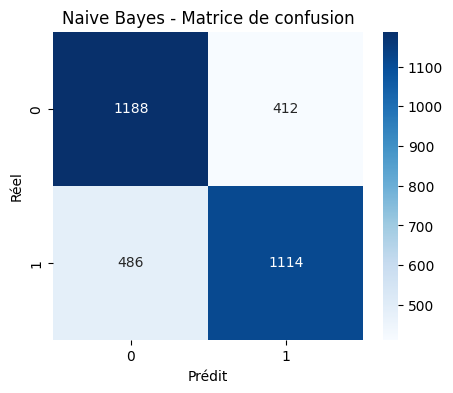

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)
y_pred_nb = model_nb.predict(X_test_tfidf)

print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1-score:", f1_score(y_test, y_pred_nb))

plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")


### 4. Bag of Words + MLP

=== Bag of Words + MLP ===
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1600
           1       0.70      0.67      0.68      1600

    accuracy                           0.69      3200
   macro avg       0.69      0.69      0.69      3200
weighted avg       0.69      0.69      0.69      3200

Accuracy: 0.688125
F1-score: 0.681150159744409


c:\Users\vicau\P7OC\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


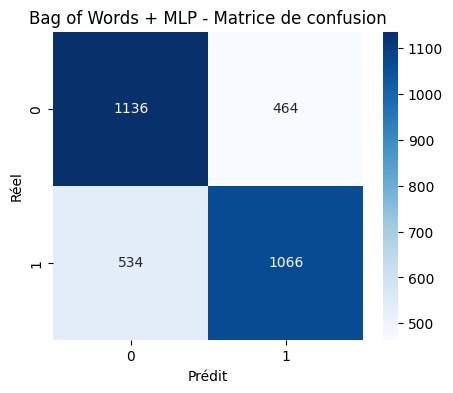

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Vectorisation bag-of-words
bow = CountVectorizer(max_features=5000, stop_words="english")
X_train_bow = bow.fit_transform(X_train).toarray()
X_test_bow  = bow.transform(X_test).toarray()

# Modèle MLP
mlp_bow = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_bow.fit(X_train_bow, y_train)
y_pred_bow = mlp_bow.predict(X_test_bow)

# Évaluation
print("=== Bag of Words + MLP ===")
print(classification_report(y_test, y_pred_bow))
print("Accuracy:", accuracy_score(y_test, y_pred_bow))
print("F1-score:", f1_score(y_test, y_pred_bow))

cm = confusion_matrix(y_test, y_pred_bow)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Bag of Words + MLP - Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()



### 5. DistilBERT (pré-entraîné)

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenisation
X_train_enc = tokenizer(list(X_train), truncation=True, padding=True, max_length=64, return_tensors="tf")
X_test_enc  = tokenizer(list(X_test), truncation=True, padding=True, max_length=64, return_tensors="tf")

# Modèle
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
optimizer = Adam(learning_rate=3e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=["accuracy"])

# Entraînement (léger pour démonstration)
model.fit(X_train_enc, y_train, validation_data=(X_test_enc, y_test), epochs=1, batch_size=16)

# Prédiction
preds = model.predict(X_test_enc).logits
y_pred = np.argmax(preds, axis=1)

# Évaluation
print("=== DistilBERT ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("DistilBERT - Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


### 6. FastText (avec la lib officielle de Meta)